In [7]:
from matplotlib.pyplot import imshow

import numpy as np

import os

from PIL import Image

from keras.models import load_model

import keract

from sklearn.decomposition import PCA

# Set Parameters

In [4]:
# Folder containing dataset
data_path = r"D:\Downloads\cats-faces-64x64-for-generative-models\cats"

# File path to trained model from PCA GAN Training script
model_path = "model.h5"

# Boolean flag, set to True if the data has pngs to remove alpha layer from images
png = False

# Load Model

In [5]:
# Load model from specified file path
model = load_model(model_path)
# Remove extra layer from model
new = model.get_layer(index=1)
new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          12864     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 64)       

C:\Users\Vee\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


# Preprocess Data

In [8]:
# Initializing arrays for data and image file paths
data = []
paths = []

# Get the file paths of all jpg files in this folder
for r, d, f in os.walk(data_path):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

# For each file add it to the data array
for path in paths:
    img = np.array(Image.open(path))

    # Remove alpha layer if imgaes are PNG
    if(png):
        img = img[...,:3]

    data.append(img)

#Reshaping data to be two dimensional for Principal Component Analysis
img_vector = np.array(data).reshape(len(data), 12288)/255

#Keep the first 512 eigenvectors of the covariance matrix of the img_vector
pca = PCA(n_components=512).fit(img_vector)
pca_data = pca.transform(img_vector)

# Reshape X_train to two dimensions
x_train = pca_data.reshape(len(pca_data), 512)

# Get Random Element Of X_Train Dataset

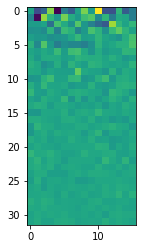

In [53]:
x = x_train[(int)(np.random.rand()*len(x_train))].reshape(1,512)
imshow(x.reshape(32,16))

# Generate Prediction From Random Element Of X_Train Dataset

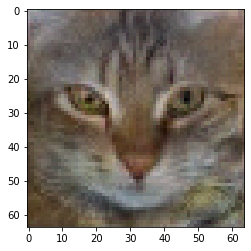

In [54]:
result = np.array(model.predict(x))
result = result.reshape(1,64,64,3)
result = result*255
result = result.astype(int)
imshow(result[0])

# Get Convolutional Filters

In [55]:
# Get activations of each layer on the model
activations = keract.get_activations(new, x, auto_compile=True)

# Visualize Convolutional Filters

In [56]:
# Plot and save visualizations of inference through each filter
keract.display_activations(activations, save=True)

dense_2 (1, 512) 
reshape_1 (1, 8, 8, 8) 
conv2d_7 (1, 8, 8, 64) 
leaky_re_lu_1 (1, 8, 8, 64) 
up_sampling2d_1 (1, 16, 16, 64) 
conv2d_8 (1, 16, 16, 64) 
leaky_re_lu_2 (1, 16, 16, 64) 
up_sampling2d_2 (1, 32, 32, 64) 
conv2d_9 (1, 32, 32, 64) 
leaky_re_lu_3 (1, 32, 32, 64) 
up_sampling2d_3 (1, 64, 64, 64) 
conv2d_10 (1, 64, 64, 64) 
leaky_re_lu_4 (1, 64, 64, 64) 
conv2d_11 (1, 64, 64, 3) 
leaky_re_lu_5 (1, 64, 64, 3) 
